# Exercise 7 - Problems 3-5 (18 points in total)

## Problem 3 - Seasonal temperature anomalies, visualized (8 points)


![seasonal_anomalies.png](img/seasonal_anomalies.png)

For Problem 3, the goal is to visualize temperature anomalies for each season (Winter, Spring, Summer, Fall) over a thirty-year period (1988-2018) in four subplots.


### Steps


**1:** Read in the input data `data/helsinki-vantaa.csv` the same way you did in problem 2. Remember to parse dates from column `DATE`!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fp = 'data/helsinki-vantaa.csv'

data = pd.read_csv(fp, sep=',', parse_dates=['DATE'], index_col='DATE')

In [4]:
# This test print should print first five rows
print(data.head())

               USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                          
1952-01-01  29740.0  28.347826 -2.028986    -4.93665  2.907665
1953-01-01  29740.0  22.190083 -5.449954    -4.93665 -0.513304
1954-01-01  29740.0  19.864407 -6.741996    -4.93665 -1.805346
1955-01-01  29740.0  22.583333 -5.231481    -4.93665 -0.294831
1956-01-01  29740.0  18.254237 -7.636535    -4.93665 -2.699885


In [5]:
# Check the number of rows in the data frame
print(len(data))

706


**2:** Create a variable `selection` and store the data into it covering months starting from January 1988 and up to the end of the year 2018 (last month should be December 2018). 

In [7]:
selection = data.loc[(data.index >= '19880101') & (data.index < '20190101')]

In [8]:
# This test print should print first five rows
print(selection.head())

               USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                          
1988-01-01  29740.0  27.404003 -2.553332    -4.93665  2.383318
1989-01-01  29740.0  31.553337 -0.248146    -4.93665  4.688504
1990-01-01  29740.0  25.030890 -3.871728    -4.93665  1.064922
1991-01-01  29740.0  26.592345 -3.004253    -4.93665  1.932397
1992-01-01  29740.0  29.107965 -1.606686    -4.93665  3.329964


**3:** Create four variables (`winter`, `spring`, `summer`, and `fall`) and store rows from the `selection` DataFrame into those variables that meet following criteria: 

  - **`winter`** DataFrame should cover months from December to February
  - **`spring`** DataFrame should cover months from March to May
  - **`summer`** DataFrame should cover months from June to August
  - **`fall`** DataFrame should cover months from September to November
  
**Important**: Use lower case naming for the variables.

**HINT:**

- assuming that you have correctly set a datetime index to your data frame, you can access the month of each time stamp using `selection.index.month`.

In [10]:
# Create DataFrames and store the data from specified months

winter = selection[selection.index.month.isin([12, 1, 2])]

spring = selection[selection.index.month.isin([3, 4, 5])]

summer = selection[selection.index.month.isin([6, 7, 8])]

fall = selection[selection.index.month.isin([9, 10, 11])]

In [11]:
# These test prints should print first 3 rows of the winter DataFrame
print(winter.head(3))

               USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                          
1988-01-01  29740.0  27.404003 -2.553332    -4.93665  2.383318
1989-01-01  29740.0  31.553337 -0.248146    -4.93665  4.688504
1990-01-01  29740.0  25.030890 -3.871728    -4.93665  1.064922


In [12]:
# These test prints should print first 3 rows of the spring DataFrame
print(spring.head(3))

               USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                          
1988-03-01  29740.0  26.399381 -3.111455    -1.88124 -1.230215
1989-03-01  29740.0  34.834767  1.574870    -1.88124  3.456111
1990-03-01  29740.0  34.696858  1.498254    -1.88124  3.379495


In [13]:
# These test prints should print first 3 rows of the summer DataFrame
print(summer.head(3))

               USAF     TEMP_F     TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                           
1988-06-01  29740.0  60.769667  15.983149    14.57888  1.404269
1989-06-01  29740.0  61.104644  16.169247    14.57888  1.590367
1990-06-01  29740.0  57.929187  14.405104    14.57888 -0.173776


In [14]:
# These test prints should print first 3 rows of the fall DataFrame
print(fall.head(3))

               USAF     TEMP_F     TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                           
1988-09-01  29740.0  52.449266  11.360703   10.680689  0.680014
1989-09-01  29740.0  52.758106  11.532281   10.680689  0.851592
1990-09-01  29740.0  47.763092   8.757273   10.680689 -1.923415


Next we want to aggregate the temperatures anomalies for each year and season: for each season in each year you should have a single mean value. 

**4:** Create four emplty DataFrames (called `winter_mean`, `spring_mean`, `summer_mean` and `fall_mean`) that should in the end contain the yearly mean Celsius temperatures from different seasons. Hence, you should group the values from the data frames made in the last step 2 (separately for each season) based on year, and calculate the annual mean of each season.

**HINTS:**
- First, create a new column "year" in the seasonal data frames, and group the data based on this column
- You can access the year of the original dataframe like this: `DataFrameName.index.year`
- First rows of `winter_mean` should look something like this (in case you keep all the columns): 

```
        USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
year                                                    
1988  29740.0  24.331653 -4.260193   -4.567182  0.306990
1989  29740.0  29.190170 -1.561017   -4.567182  3.006165
1990  29740.0  29.805810 -1.218995   -4.567182  3.348188
1991  29740.0  25.711078 -3.493846   -4.567182  1.073337
1992  29740.0  30.066271 -1.074294   -4.567182  3.492888
```

*we will only need `year` and `DIFF_C` for plotting at the end, but it is ok to have all original columns in at this point*


In [16]:
# Calculate yearly means for each season
#create empty Dataframes
winter_mean = pd.DataFrame()
spring_mean = pd.DataFrame()
summer_mean = pd.DataFrame()
fall_mean = pd.DataFrame()

# Create a Year column for every season Dataframe
winter['YEAR'] = winter.index.year
spring['YEAR'] = spring.index.year
summer['YEAR'] = summer.index.year
fall['YEAR'] = fall.index.year

#Create four new DF that a grouped by year and contain the averages of the respective season's months
winter_mean = winter.groupby(by=['YEAR']).mean()
spring_mean = spring.groupby(by=['YEAR']).mean()
summer_mean = summer.groupby(by=['YEAR']).mean()
fall_mean = fall.groupby(by=['YEAR']).mean()

C:\Users\Finn\AppData\Local\Temp\ipykernel_14224\3979403170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter['YEAR'] = winter.index.year
C:\Users\Finn\AppData\Local\Temp\ipykernel_14224\3979403170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring['YEAR'] = spring.index.year
C:\Users\Finn\AppData\Local\Temp\ipykernel_14224\3979403170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [17]:
# These test prints should print data from first 5 years of the winter DataFrame
print(winter_mean.head())

         USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
YEAR                                                    
1988  29740.0  24.331653 -4.260193   -4.567182  0.306990
1989  29740.0  29.190170 -1.561017   -4.567182  3.006165
1990  29740.0  29.805810 -1.218995   -4.567182  3.348188
1991  29740.0  25.711078 -3.493846   -4.567182  1.073337
1992  29740.0  30.066271 -1.074294   -4.567182  3.492888


In [18]:
# These test prints should print data from first 5 years of the spring DataFrame
print(spring_mean.head())

         USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
YEAR                                                    
1988  29740.0  38.380349  3.544638    4.156056 -0.611417
1989  29740.0  42.834668  6.019260    4.156056  1.863204
1990  29740.0  42.605411  5.891895    4.156056  1.735839
1991  29740.0  38.660493  3.700274    4.156056 -0.455782
1992  29740.0  40.650443  4.805801    4.156056  0.649746


In [19]:
# These test prints should print data from first 5 years of the summer DataFrame
print(summer_mean.head())

         USAF     TEMP_F     TEMP_C  REF_TEMP_C    DIFF_C
YEAR                                                     
1988  29740.0  62.056322  16.697957   16.011107  0.686849
1989  29740.0  60.888802  16.049335   16.011107  0.038227
1990  29740.0  59.615340  15.341855   16.011107 -0.669252
1991  29740.0  60.442004  15.801114   16.011107 -0.209994
1992  29740.0  60.729879  15.961044   16.011107 -0.050063


In [20]:
# These test prints should print data from first 5 years of the fall DataFrame
print(fall_mean.head())

         USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
YEAR                                                    
1988  29740.0  39.712139  4.284522    5.599574 -1.315053
1989  29740.0  42.495438  5.830799    5.599574  0.231225
1990  29740.0  39.912823  4.396013    5.599574 -1.203562
1991  29740.0  43.389536  6.327520    5.599574  0.727946
1992  29740.0  38.833375  3.796320    5.599574 -1.803255


**5:** Create a figure with 4 subplots in the arrangement shown above, labeling axes as needed, with gridlines on, and with a line legend for each panel.

**HINTS:**

- Create a figure object with 4 subplots before plotting the data
- If you want, you can run `plt.style.use('seaborn-whitegrid')`  before creating the figure object to change the style of the plot. For other available styles, see Matplotlib [style sheet reference](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html).
- Look for additional tips in the [Matplotlib documentation](https://matplotlib.org/contents.html) and the hints for this week's exercise on the course page.



**6:** Save your plot as PNG file into disk with filename `seasonal_temperatures.png` 

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

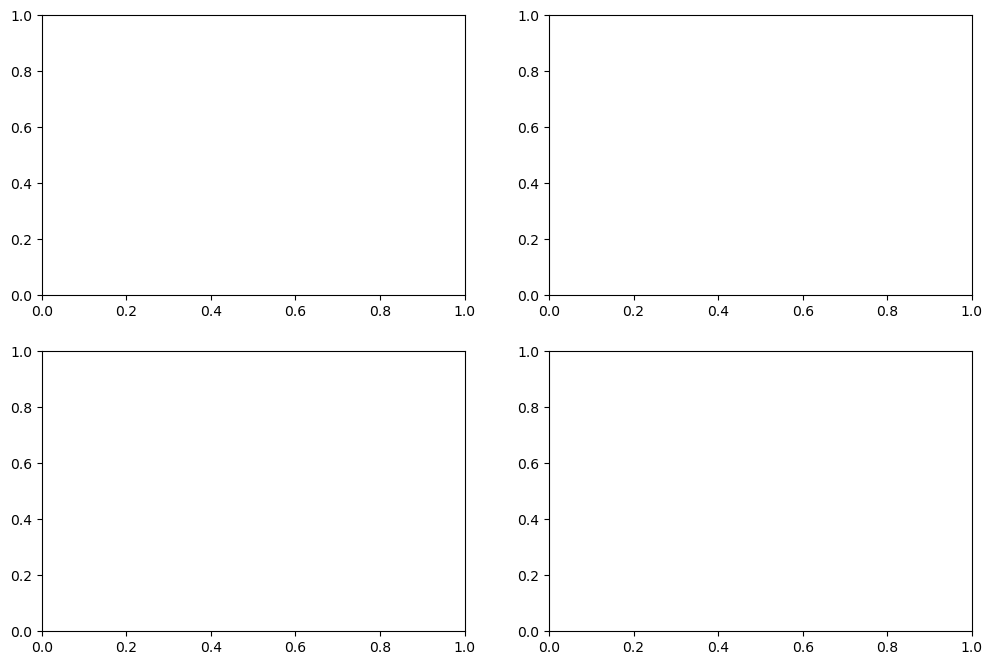

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes

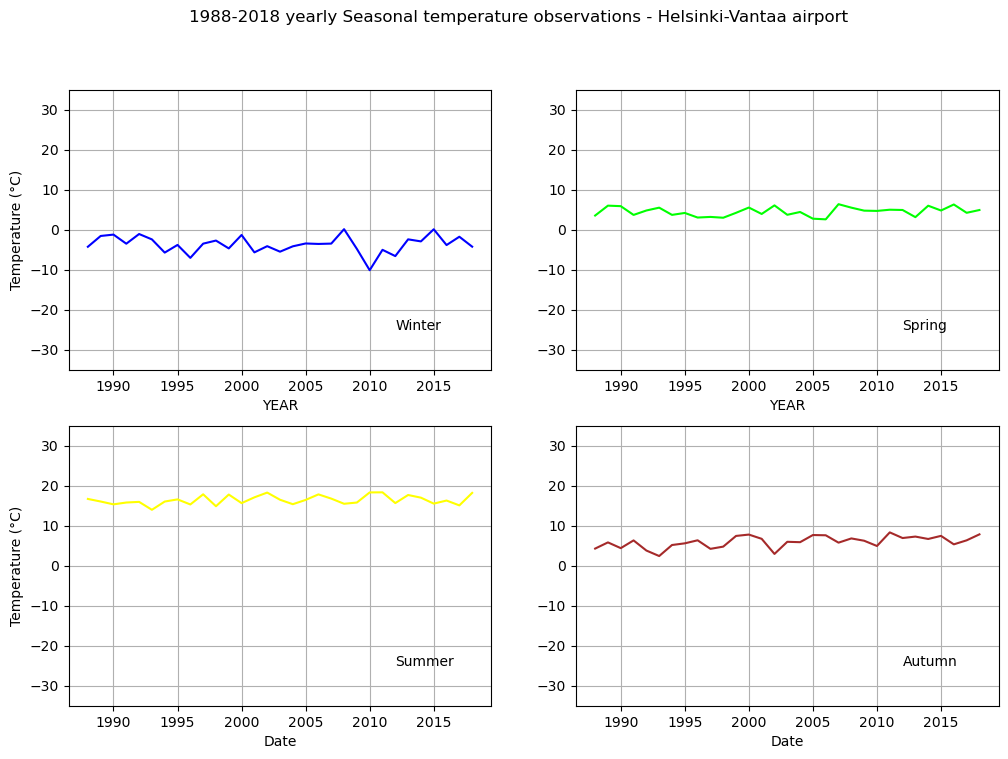

In [104]:
#plt.style.use('seaborn-whitegrid')
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


winter_mean_s = winter_mean['TEMP_C']
spring_mean_s = spring_mean['TEMP_C']
summer_mean_s = summer_mean['TEMP_C']
fall_mean_s = fall_mean['TEMP_C']

ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

line_width = 1.5

winter_mean_s.plot(ax=ax11, y='TEMP_C', c='blue', lw=line_width, ylim=[-35, 35], grid=True)
spring_mean_s.plot(ax=ax12, c='lime', lw=line_width, ylim=[-35, 35], grid=True)
summer_mean_s.plot(ax=ax21, c='yellow', lw=line_width, ylim=[-35, 35], grid=True)
fall_mean_s.plot(ax=ax22, c='brown', lw=line_width, ylim=[-35, 35], grid=True)

fig.suptitle("1988-2018 yearly Seasonal temperature observations - Helsinki-Vantaa airport")

ax11.set_ylabel('Temperature (°C)')
ax21.set_ylabel('Temperature (°C)')
ax21.set_xlabel('Date')
ax22.set_xlabel('Date')

ax11.text(2012, -25, "Winter")
ax12.text(2012, -25, "Spring")
ax21.text(2012, -25, "Summer")
ax22.text(2012, -25, "Autumn")

outputfp = '1988-2018 yearly Seasonal temperature observations - Helsinki-Vantaa airport.png'
plt.savefig(outputfp)

Remember to commit your changes to this notebook and the png-file to GitHub! Also, remember to comment your code :)

### Done!

That's it! Now you can continue into problem 4.

# Problem 4 - Bar-plot for seasonal temperature anomalies (6 points)

In this problem the aim is to create a single plot where the temperature anomalies for different seasons for one year are visualized with barplot. The result figure should look something like following where temperatures above 0 degrees are plotted with red color, and the temperatures below or equal to zero degree are plotted with blue color:

![seasonal anomalies](img/seasonal_anomalies_bar.png)

Below, you can find suggested steps for generating this plot for year 2012.

## Steps

**1:** Create four variables `wi`, `sp`, `su`, and `fa` that corresponds to different seasons (namely winter, spring, summer and fall). You should store for each of these variables the **mean anomaly temperature** for each season of the year **2012** (one floating point value per season).  

**Hint:** You can continue working with the same data frames created in Problem 3 (i.e. winter_mean, spring_mean, etc. --> column `DIFF_C`).

In [78]:
# Get temperature anomaly for each season for year 2012:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

NotImplementedError: 

**2:** Create a list called `seasons` with four values: `wi`, `sp`, `su` and `fa`. 

In [81]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# This test print should print four floating point values in a list:
print(seasons)


**3:** Visualize the seasonal anomalies as a barplot.

Here are suggested steps for creating the plot:

- Initialize the **figure** and **ax** with Matplotlib's `plt.subplots()` -function. You do not need pass any parameters (**[see hints](https://geo-python.github.io/2018/lessons/L7/exercise-7.html)**).

- Use **`enumerate()`** -function (**[see hints](https://geo-python.github.io/site/lessons/L7/exercise-7.html)**) to (for) loop over the values in **seasons** list. When looping, you should store the list value into a variable called **`season`**. By using `enumerate()` -function you will, in addition to the list value, also get the index. 


- **Inside the loop** (for each season): 
    - Create a variable called `color`, and assign value **`"red"`** if the value in `season` is **higher than 0**, and **`"blue"`** in all other cases. 
    - Visualize the data with bar plot by using the Matplotlib's `bar()` -function. The **x** -parameter should be the **index** of the `seasons` list (the one you are iterating over), and the **y** -parameter should be the temperature value from **`season`** -variable, and the parameter **`width`** should be **`1.0`**.


- **After the loop** (for the whole figure): 
    - Specify the value limits for y-axis: lower boundary should be **-6** and the higher boundary should be **6**. You should use the `set_ylim()` -function to do this (see lesson materials). 
    - Remove the x-axis ticks from the plot with command (you can just copy-paste this): `ax.set_xticks([], [])`
    - Give intuitive annotations for each bar: use `text()` -function to add following texts to specified positions:
        - Winter: at position `x=0` and `y=-5.5` add text **`Winter`**
        - Spring: at position `x=1` and `y=-5.5` add text **`Spring`**
        - Summer: at position `x=2` and `y=-5.5` add text **`Summer`**
        - Fall: at position `x=3` and `y=-5.5` add text **`Fall`**
    - Add title **`Seasonal weather anomalies in Helsinki`** to the plot. You can use parameter `fontsize=16` to adjust the fontsize to be the same as in example figure. 
    - Add xlabel **`2012`** to the plot. You can use parameter `fontsize=16` to adjust the fontsize to be the same as in example figure. 
    - Add ylabel **`Difference from long-term\naverage temperature (Celsius)`** to the plot. You can use parameter `fontsize=14` to adjust the fontsize to be the same as in example figure. 
    - Save the figure into disk with name `seasonal_anomalies_in_2012.png`
  
     
       

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

4: Upload the figure and the notebook into your personal GitHub repository.

### Done!

That's it! Now you can continue into problem 5 (below).

## Problem 5 - Seasonal temperature anomalies, animated (5 points)

The goal for this problem is to plot seasonal temperature anomalies for yeach year and for each season from 1988 to 2018:

![temp_anomaly_animation.gif](img/temperature_anomaly_animation.gif)<br/>
*You can generate the GIF in optional problem 6!*

**The solution from Problem 4 gives a good starting for this problem**, as now we are producing many similar plots and automating the generation of those visualizations by looping over different years. The instructions repeats quite many of the steps from Problem 4, but **they are not completely identical to the solution in problem 4!**. 

## Steps

First, you might want to copy and paste your solution from Problem 4 into the cell below and start modifying that code:

 - Create variables new variables at the top of the code block:
     - `start_year` that should contain the first year in the observation period (1988)
     - `stop_year` that should contain the last year in the observation period + 1 (2019) 
     
 - Create a `for` loop for repeating the process for each year from 1988 to 2018:
     - You can use the `range()` function and `start_year` and `stop_year` to define the correct range. 
     
 
 - **For yeach year** (inside the loop, use code for a single year from problem 4):
     - Create variables `wi`, `sp`, `su`, and `fa` that corresponds to different seasons (namely winter, spring, summer and fall) and store the corresponding **mean anomaly temperature** for each season of the **`year`** that you are looping over. 
     - Create a list called `seasons` with four values: `wi`, `sp`, `su` and `fa`. 
     - Initialize the **figure** and **ax** with Matplotlib's `plt.subplots()` -function. 
     - For each season, visualize the data (loop over the values in **seasons** using **`enumerate()`** like you did in problem 4):
         - **Set colors, Option 1:** use red for temperatures greater than zero, and blue for zero and below (similarly as in problem 4)
         - **Set colors, Option 2:** (totally optional!) using [hex colors](https://en.wikipedia.org/wiki/Web_colors#Hex_triplet) and the following criteria:
             - if `season` value is **higher than 3** the color of the bar is `'#b2182b'` 
             - if `season` value is **higher than 2 and below or equal to 3** the color of the bar is `'#ef8a62'`
             - if `season` value is **higher or equal to 0 and below or equal to 2** the color of the bar is `'#fddbc7'`
             - if `season` value is **lower or equal to -3** the color of the bar is `'#2166ac'`
             - if `season` value is **lower or equal to -2 and higher than -3** the color of the bar is `'#67a9cf'
             - if `season` value is **lower than 0 and higher than -2** the color of the bar is `'#d1e5f0'`
         - **Plot the data** (same as problem 4):
             - Visualize the data using the Matplotlib's `bar()` -function. The **x** -parameter should be the **index** of the `seasons` list (the one you are iterating over), and the **y** -parameter should be the temperature value from **`season`** -variable, and the parameter **`width`** should be **`1.0`**.

          
  - **After looping yeach season (i.e. back to first-level loop for one year)**: 
      - Specify the value limits for y-axis: lower boundary should be **-6** and the higher boundary should be **6**. You should use the `set_ylim()` -function to do this. 
      - Remove the x-axis ticks from the plot with command: `ax.set_xticks([], [])`
      - Annotate the bars: use `text()` -function to add following texts to specified positions:
          - Winter: at position `x=0` and `y=-5.5` add text **`Winter`**
          - Spring: at position `x=1` and `y=-5.5` add text **`Spring`**
          - Summer: at position `x=2` and `y=-5.5` add text **`Summer`**
          - Fall: at position `x=3` and `y=-5.5` add text **`Fall`**
      - Add title **`Seasonal weather anomalies in Helsinki`** to the plot, `fontsize=16`.
      - Add xlabel according to the **`year`** you are plotting, `fontsize=16`.
      - Add ylabel **`Difference from long-term\naverage temperature (Celsius)`** to the plot, `fontsize=14`.
      - Create a variable called **`outfp`** and store the name of output file into it following formula `seasonal_anomalies_in_YEARX.png` where the YEARX should be replaced with the year you are iterating over.
      - **note:** it might be a good idea to create a new folder, such as `figures` into your repository, and define the output filepath as: `figures/seasonal_anomalies_in_YEARX.png`!
      - Save the figure into disk using the filepath you specified.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

Remember to commit all the figures and this notebook to your own personal GitHub repository. 

## Done!

That's it now you have successfully programmed a process where you visualize data automatically for many years! Pretty cool isn't it! 

As a next (optional) step, you can continue to [Problem 6](Exercise-7-problem-6.ipynb) to generate a GIF out of the image files. 